Importing Libraries

In [70]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set(color_codes = True)
print("Done")

Done


Reading DataSet

In [71]:
data = pd.read_csv("/content/seattle-weather.csv")

In [72]:
df = pd.DataFrame(data)

EDA --> Exploratory Data Analysis

In [73]:
df.head()

,date,precipitation,temp_max,temp_min,wind,weather
0,2012-01-01,0.0,12.8,5.0,4.7,drizzle
1,2012-01-02,10.9,10.6,2.8,4.5,rain
2,2012-01-03,0.8,11.7,7.2,2.3,rain
3,2012-01-04,20.3,12.2,5.6,4.7,rain
4,2012-01-05,1.3,8.9,2.8,6.1,rain


In [74]:
df.tail()

,date,precipitation,temp_max,temp_min,wind,weather
1456,2015-12-27,8.6,4.4,1.7,2.9,rain
1457,2015-12-28,1.5,5.0,1.7,1.3,rain
1458,2015-12-29,0.0,7.2,0.6,2.6,fog
1459,2015-12-30,0.0,5.6,-1.0,3.4,sun
1460,2015-12-31,0.0,5.6,-2.1,3.5,sun


In [75]:
df.dtypes

date              object
precipitation    float64
temp_max         float64
temp_min         float64
wind             float64
weather           object
dtype: object

In [76]:
df.shape

(1461, 6)

In [77]:
duplicate = df[df.duplicated()]
print(duplicate.shape)
print(duplicate)

(0, 6)
Empty DataFrame
Columns: [date, precipitation, temp_max, temp_min, wind, weather]
Index: []


In [78]:
df.count()

date             1461
precipitation    1461
temp_max         1461
temp_min         1461
wind             1461
weather          1461
dtype: int64

In [79]:
df = df.drop_duplicates()

In [80]:
df.head()

,date,precipitation,temp_max,temp_min,wind,weather
0,2012-01-01,0.0,12.8,5.0,4.7,drizzle
1,2012-01-02,10.9,10.6,2.8,4.5,rain
2,2012-01-03,0.8,11.7,7.2,2.3,rain
3,2012-01-04,20.3,12.2,5.6,4.7,rain
4,2012-01-05,1.3,8.9,2.8,6.1,rain


In [81]:
df.count()

date             1461
precipitation    1461
temp_max         1461
temp_min         1461
wind             1461
weather          1461
dtype: int64

In [82]:
df.isnull().sum()

date             0
precipitation    0
temp_max         0
temp_min         0
wind             0
weather          0
dtype: int64

In [83]:
df = df.dropna()
df.count()

date             1461
precipitation    1461
temp_max         1461
temp_min         1461
wind             1461
weather          1461
dtype: int64

<Axes: xlabel='precipitation'>

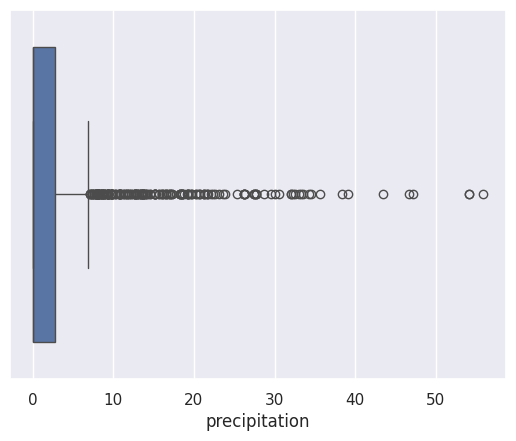

In [84]:
sns.boxplot(x = df['precipitation'])

<Axes: xlabel='temp_max'>

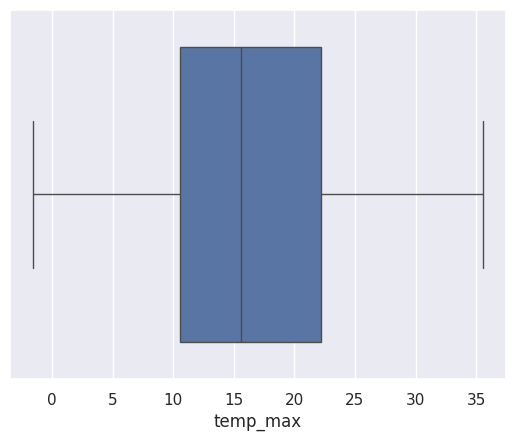

In [85]:
sns.boxplot(x = df['temp_max'])

<Axes: xlabel='temp_min'>

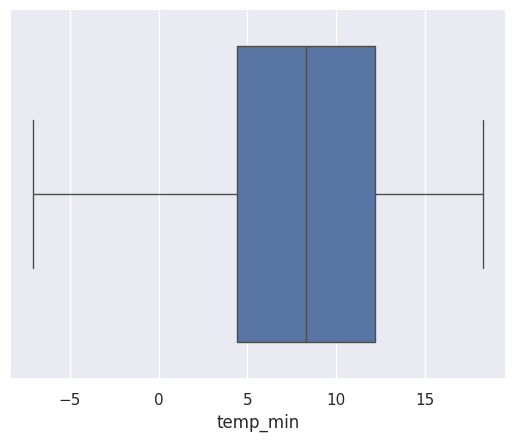

In [86]:
sns.boxplot(x = df['temp_min'])

<Axes: xlabel='wind'>

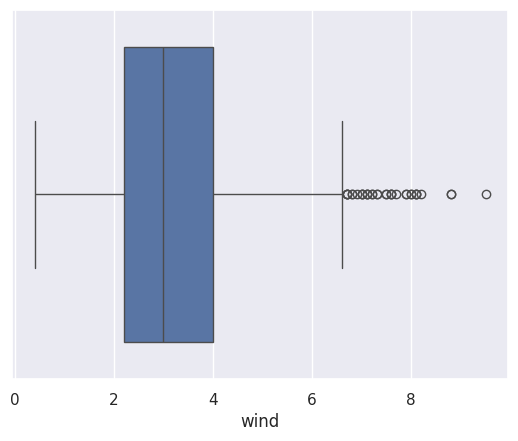

In [87]:
sns.boxplot(x = df['wind'])

In [88]:
df['weather'].unique()

array(['drizzle', 'rain', 'sun', 'snow', 'fog'], dtype=object)

In [89]:
from sklearn import preprocessing
label_encoder = preprocessing.LabelEncoder()
df['weather'] = label_encoder.fit_transform(df['weather'])

In [90]:
df['weather'].unique()

array([0, 2, 4, 3, 1])

In [91]:
df['date'] = pd.to_datetime(df['date'], errors='coerce')
df['day'] = df['date'].dt.day
df['month'] = df['date'].dt.month
df['year'] = df['date'].dt.year

In [92]:
df.drop('date',axis = 1)
df.head()

,date,precipitation,temp_max,temp_min,wind,weather,day,month,year
0,2012-01-01,0.0,12.8,5.0,4.7,0,1,1,2012
1,2012-01-02,10.9,10.6,2.8,4.5,2,2,1,2012
2,2012-01-03,0.8,11.7,7.2,2.3,2,3,1,2012
3,2012-01-04,20.3,12.2,5.6,4.7,2,4,1,2012
4,2012-01-05,1.3,8.9,2.8,6.1,2,5,1,2012


In [93]:
print(df['weather'].unique())

[0 2 4 3 1]


<Axes: xlabel='weather', ylabel='precipitation'>

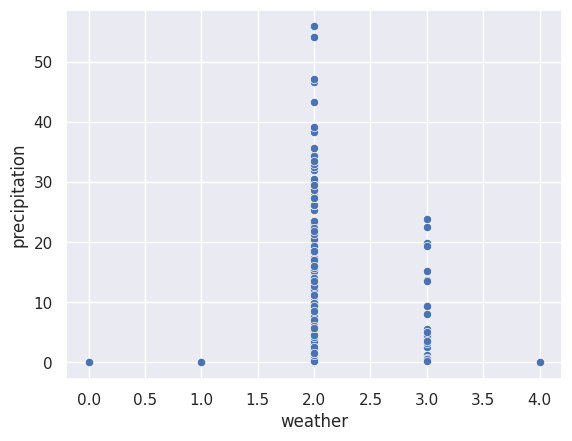

In [94]:
sns.scatterplot(data = df, x =df['weather'],y=df['precipitation'])

<Axes: xlabel='weather', ylabel='temp_max'>

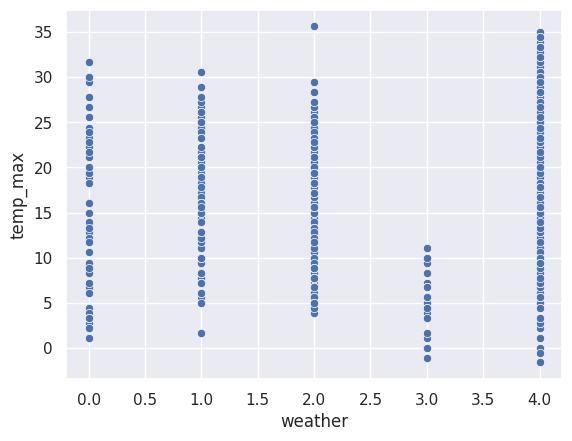

In [95]:
sns.scatterplot(data = df, x =df['weather'],y=df['temp_max'])

<Axes: xlabel='weather', ylabel='wind'>

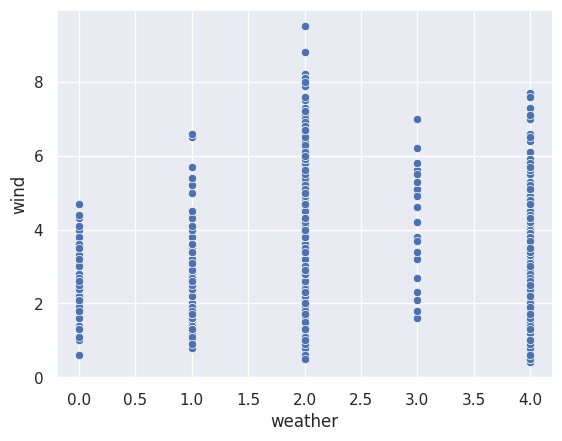

In [96]:
sns.scatterplot(data = df, x =df['weather'],y=df['wind'])

<Axes: xlabel='precipitation', ylabel='wind'>

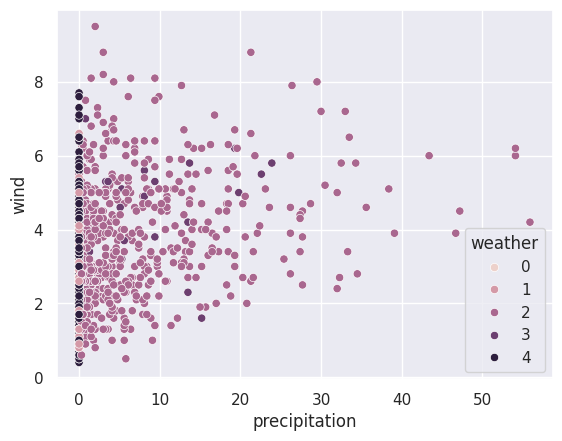

In [97]:
sns.scatterplot(data = df, x = df['precipitation'], y =df['wind'], hue = df['weather'])

<Axes: xlabel='temp_max', ylabel='temp_min'>

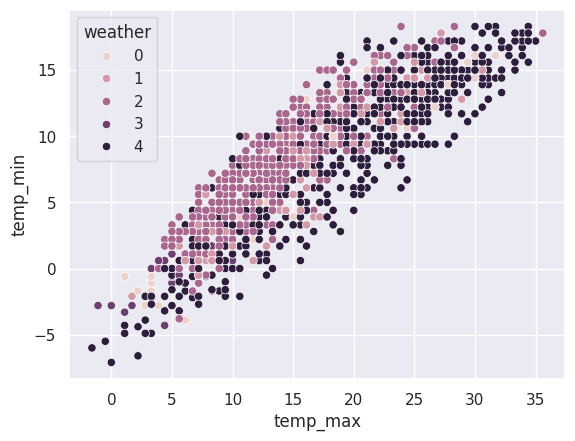

In [98]:
sns.scatterplot(data = df, x = df['temp_max'], y =df['temp_min'], hue = df['weather'])

In [99]:
df

,date,precipitation,temp_max,temp_min,wind,weather,day,month,year
0,2012-01-01,0.0,12.8,5.0,4.7,0,1,1,2012
1,2012-01-02,10.9,10.6,2.8,4.5,2,2,1,2012
2,2012-01-03,0.8,11.7,7.2,2.3,2,3,1,2012
3,2012-01-04,20.3,12.2,5.6,4.7,2,4,1,2012
4,2012-01-05,1.3,8.9,2.8,6.1,2,5,1,2012
...,...,...,...,...,...,...,...,...,...
1456,2015-12-27,8.6,4.4,1.7,2.9,2,27,12,2015
1457,2015-12-28,1.5,5.0,1.7,1.3,2,28,12,2015
1458,2015-12-29,0.0,7.2,0.6,2.6,1,29,12,2015
1459,2015-12-30,0.0,5.6,-1.0,3.4,4,30,12,2015


In [110]:
df = df.drop(columns=['date','day'],axis = 1)

In [111]:
df

,precipitation,temp_max,temp_min,wind,weather,month,year
0,0.0,12.8,5.0,4.7,0,1,2012
1,10.9,10.6,2.8,4.5,2,1,2012
2,0.8,11.7,7.2,2.3,2,1,2012
3,20.3,12.2,5.6,4.7,2,1,2012
4,1.3,8.9,2.8,6.1,2,1,2012
...,...,...,...,...,...,...,...
1456,8.6,4.4,1.7,2.9,2,12,2015
1457,1.5,5.0,1.7,1.3,2,12,2015
1458,0.0,7.2,0.6,2.6,1,12,2015
1459,0.0,5.6,-1.0,3.4,4,12,2015


In [117]:
X = df.iloc[:,:-1]
Y = df.iloc[:,4]

In [103]:
from sklearn.model_selection import train_test_split

In [118]:
X_train, X_test, y_train, y_test = train_test_split(X,Y,test_size=0.7,random_state=0)

DECISION TREE --> 100% ACCURACY

In [119]:
from sklearn.tree import DecisionTreeClassifier

In [121]:
tree = DecisionTreeClassifier(random_state = 0)

In [122]:
tree.fit(X_train,y_train)

DecisionTreeClassifier(random_state=0)

In [123]:
print("Accuracy on training set: {:.3f}".format(tree.score(X_train, y_train)))
print("Accuracy on test set: {:.3f}".format(tree.score(X_test, y_test)))

Accuracy on training set: 1.000
Accuracy on test set: 1.000


In [125]:
from sklearn.tree import export_graphviz
export_graphviz(tree, out_file="tree.dot", class_names=["0","1","2","3","4"],
 feature_names=["precipitation","temp_max","temp_min","wind","month","year"], impurity=False, filled=True)

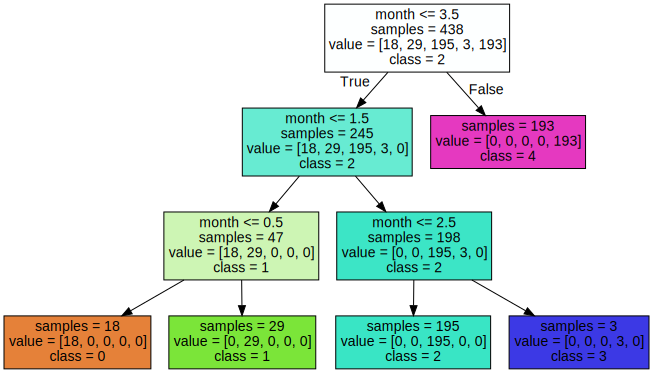

In [126]:
import graphviz
with open("tree.dot") as f:
 dot_graph = f.read()
graphviz.Source(dot_graph)

In [129]:
y_pred = tree.predict(X_test)
print(y_pred)
print(y_test)

[4 4 2 ... 3 2 4]
530     4
657     4
459     2
279     4
656     4
       ..
1321    2
676     2
375     3
975     2
185     4
Name: weather, Length: 1023, dtype: int64


In [134]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

In [141]:
from sklearn import metrics
cm = metrics.confusion_matrix(y_test,y_pred)

In [131]:
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [False, True])

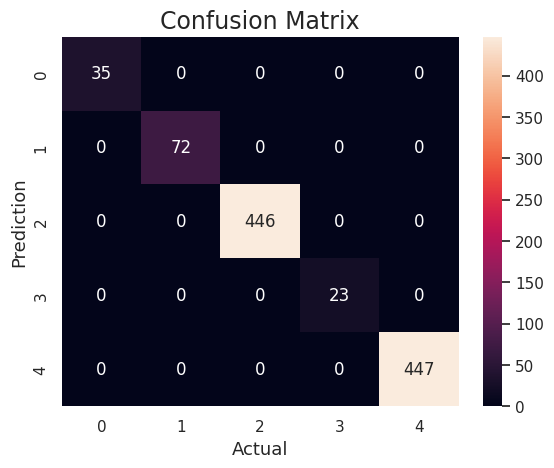

In [142]:
sns.heatmap(cm,
            annot=True,
            fmt='g',
            xticklabels=['0','1','2','3','4'],
            yticklabels=['0','1','2','3','4'])
plt.ylabel('Prediction',fontsize=13)
plt.xlabel('Actual',fontsize=13)
plt.title('Confusion Matrix',fontsize=17)
plt.show()